# Data Exploratory Analysis

Purpose of this notebook is a transformation of csv to SQL.

---
# Setup

In [1]:
# dependencies - data analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

import missingno as msno
import csv

In [60]:
# dependencies - sqlalchemy
from sqlalchemy import (create_engine, MetaData, Table, 
    Column, String, Integer, insert, select, func, desc)

---
# Get data

In [3]:
csv_path = 'data/activities.csv'

In [4]:
df = pd.read_csv(csv_path)

# Create Database

In [5]:
connection_string = 'sqlite:///data/activity.sqlite'
engine = create_engine(connection_string)
engine

Engine(sqlite:///data/activity.sqlite)

In [6]:
metadata = MetaData()
metadata

MetaData(bind=None)

In [7]:
connection = engine.connect()

# Database reflection


In [8]:
df.to_sql('activity', con=engine, index=True, 
          index_label='id', if_exists='replace')

In [9]:
engine.execute('SELECT * FROM activity').fetchall()

[(0, 'Trello', 'Personal Adjusting', 1540159273005, 'Mon Oct 22 00:01:13 GMT+02:00 2018', 1540159869559, 'Mon Oct 22 00:11:09 GMT+02:00 2018', 596554, '9 min'),
 (1, 'Series / Docu', 'Entertainment', 1540159869559, 'Mon Oct 22 00:11:09 GMT+02:00 2018', 1540162820068, 'Mon Oct 22 01:00:20 GMT+02:00 2018', 2950509, '49 min'),
 (2, 'Sleep', 'Refresh', 1540162820068, 'Mon Oct 22 01:00:20 GMT+02:00 2018', 1540189458018, 'Mon Oct 22 08:24:18 GMT+02:00 2018', 26637950, '7 h 23 min'),
 (3, 'Moving - youtube', 'Transport', 1540189458018, 'Mon Oct 22 08:24:18 GMT+02:00 2018', 1540189949037, 'Mon Oct 22 08:32:29 GMT+02:00 2018', 491019, '8 min'),
 (4, 'Trello', 'Personal Adjusting', 1540189949037, 'Mon Oct 22 08:32:29 GMT+02:00 2018', 1540190444165, 'Mon Oct 22 08:40:44 GMT+02:00 2018', 495128, '8 min'),
 (5, 'Moving - youtube', 'Transport', 1540190444165, 'Mon Oct 22 08:40:44 GMT+02:00 2018', 1540190532145, 'Mon Oct 22 08:42:12 GMT+02:00 2018', 87980, '1 min'),
 (6, 'Clean', 'Personal Hygiene', 

In [52]:
activity = Table('activity', metadata,
                Column('id', Integer(), primary_key=True),
                Column('activityName', String(100)),
                Column('activityCategoryName', String(100)),
                Column('activityStartDate [ms]', Integer()),
                Column('activityStartDate', String(100)),
                Column('activityEndDate [ms]', Integer()),
                Column('activityEndDate', String(100)),
                Column('activityDuration [ms]', Integer()),
                Column('activityDuration', String(100)),
                extend_existing=True)

In [53]:
activity = Table('activity', metadata, autoload=True)
activity

Table('activity', MetaData(bind=None), Column('activityName', String(length=100), table=<activity>), Column('activityCategoryName', String(length=100), table=<activity>), Column('activityStartDate [ms]', Integer(), table=<activity>), Column('activityStartDate', String(length=100), table=<activity>), Column('activityEndDate [ms]', Integer(), table=<activity>), Column('activityEndDate', String(length=100), table=<activity>), Column('activityDuration [ms]', Integer(), table=<activity>), Column('activityDuration', String(length=100), table=<activity>), Column('id', Integer(), table=<activity>, primary_key=True, nullable=False), schema=None)

In [54]:
metadata.create_all(engine)

### Alternativ - From a list into the table
Table created fresh. We will use pandas CSV to SQL method.

```python
activity_list = []

with open(csv_path, newline='') as f:
    first_line = True
    activity_reader = csv.reader(f, delimiter=',')
    for row in activity_reader:
        if first_line:
            first_line = False
            continue
        data = {
            'activityName' : row[0],
            'activityCategoryName' : row[1],
            'activityStartDate [ms]' : row[2],
            'activityStartDate' : row[3],
            'activityEndDate [ms]' : row[4],
            'activityEndDate' : row[5],
            'activityDuration [ms]' : row[6],
            'activityDuration' : row[7]
        }
        activity_list.append(data)
    
len(activity_list)
```

```python
statement = insert(activity)
results = connection.execute(statement, activity_list)
print(results.rowcount)
```


## Get data - Standard analysis

In [55]:
# column names
activity.columns.keys()

['activityName',
 'activityCategoryName',
 'activityStartDate [ms]',
 'activityStartDate',
 'activityEndDate [ms]',
 'activityEndDate',
 'activityDuration [ms]',
 'activityDuration',
 'id']

In [56]:
# shape of table
statement = select([func.count(activity)])
results = connection.execute(statement).first()
(results[0], len(activity.columns.keys()))

(3386, 9)

In [57]:
# head
statement = select([activity])
statement = statement.limit(5)
results = connection.execute(statement).fetchall()
results

[('Trello', 'Personal Adjusting', 1540159273005, 'Mon Oct 22 00:01:13 GMT+02:00 2018', 1540159869559, 'Mon Oct 22 00:11:09 GMT+02:00 2018', 596554, '9 min', 0),
 ('Series / Docu', 'Entertainment', 1540159869559, 'Mon Oct 22 00:11:09 GMT+02:00 2018', 1540162820068, 'Mon Oct 22 01:00:20 GMT+02:00 2018', 2950509, '49 min', 1),
 ('Sleep', 'Refresh', 1540162820068, 'Mon Oct 22 01:00:20 GMT+02:00 2018', 1540189458018, 'Mon Oct 22 08:24:18 GMT+02:00 2018', 26637950, '7 h 23 min', 2),
 ('Moving - youtube', 'Transport', 1540189458018, 'Mon Oct 22 08:24:18 GMT+02:00 2018', 1540189949037, 'Mon Oct 22 08:32:29 GMT+02:00 2018', 491019, '8 min', 3),
 ('Trello', 'Personal Adjusting', 1540189949037, 'Mon Oct 22 08:32:29 GMT+02:00 2018', 1540190444165, 'Mon Oct 22 08:40:44 GMT+02:00 2018', 495128, '8 min', 4)]

In [61]:
# tail
statement = select([activity])
statement = statement.order_by(desc(activity.columns.id))
statement = statement.limit(5)
results = connection.execute(statement).fetchall()
results

[('Clean', 'Personal Hygiene', 1551256313154, 'Wed Feb 27 09:31:53 GMT+01:00 2019', 1551257046239, 'Wed Feb 27 09:44:06 GMT+01:00 2019', 733085, '12 min', 3385),
 ('Sport', 'Sport', 1551255533154, 'Wed Feb 27 09:18:53 GMT+01:00 2019', 1551256313154, 'Wed Feb 27 09:31:53 GMT+01:00 2019', 780000, '13 min', 3384),
 ('Learning - Language', 'Learning', 1551254587367, 'Wed Feb 27 09:03:07 GMT+01:00 2019', 1551255533154, 'Wed Feb 27 09:18:53 GMT+01:00 2019', 945787, '15 min', 3383),
 ('Social - girl', 'Social - Persist', 1551252667367, 'Wed Feb 27 08:31:07 GMT+01:00 2019', 1551254587367, 'Wed Feb 27 09:03:07 GMT+01:00 2019', 1920000, '32 min', 3382),
 ('Learning - Language', 'Learning', 1551251227367, 'Wed Feb 27 08:07:07 GMT+01:00 2019', 1551252667367, 'Wed Feb 27 08:31:07 GMT+01:00 2019', 1440000, '24 min', 3381)]

### Get data - Standard analysis - Missing data

In [19]:
df.isnull().sum()

activityName              0
activityCategoryName      0
activityStartDate [ms]    0
activityStartDate         0
activityEndDate [ms]      0
activityEndDate           0
activityDuration [ms]     0
activityDuration          0
dtype: int64

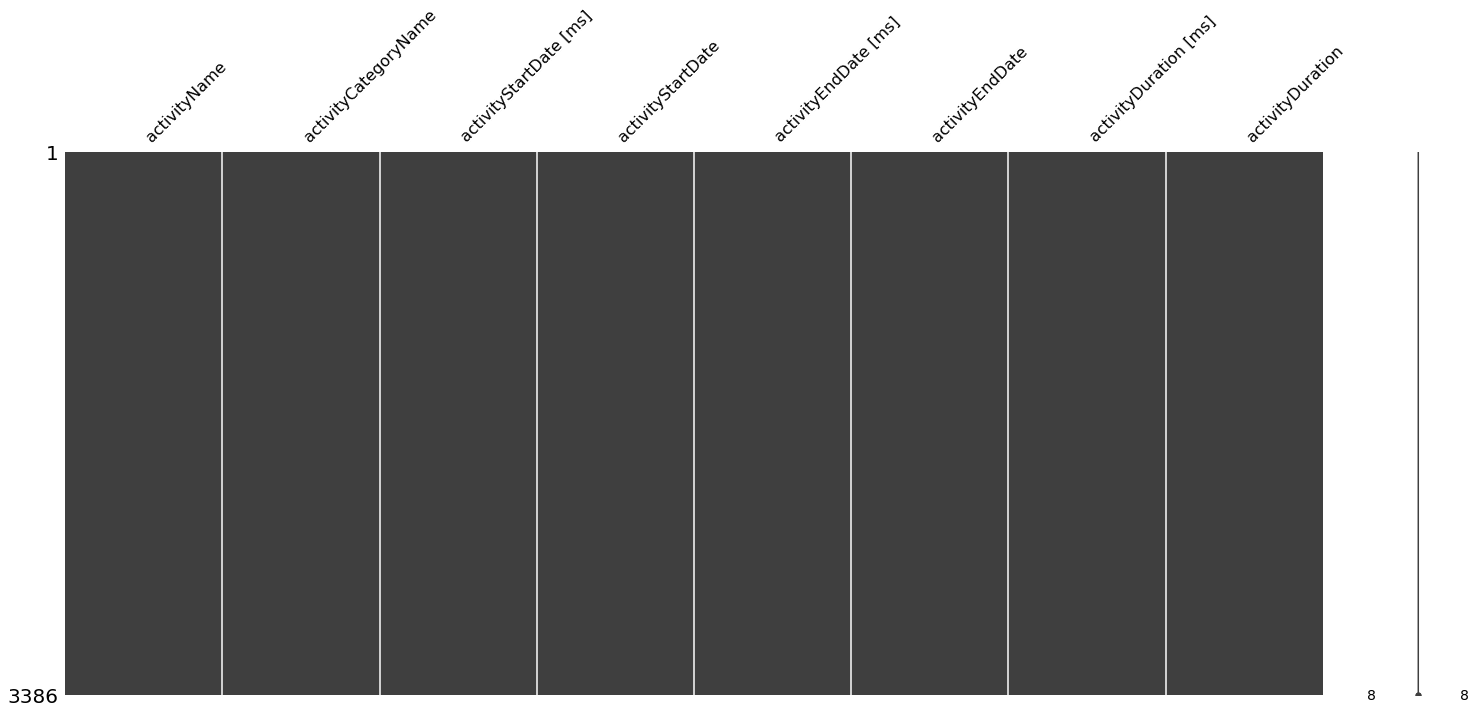

In [20]:
# Nice visualization
msno.matrix(df) 

# Conclusion: Clean Data
No missing values are found in the data. No filling of missing values is necessary. 

---
# Clean table creation
Goal is to create a cleaned data, selected features and augmented table.

## Clean table creation - Feature selection 

Let's take only relevant features into our clean table:
- activity, 
- category, 
- start_date_timestamp, 
- start_date,
- end_date_timestamp,
- end_date,
- activity_duration[m]   # minutes

In [21]:
clean_table = pd.DataFrame()
clean_table['activity'] = df['activityName']
clean_table['category'] = df['activityCategoryName']
clean_table['start_date[ms]'] = df['activityStartDate [ms]']
clean_table['start_date'] = df['activityStartDate']
clean_table['end_date[ms]'] = df['activityEndDate [ms]']
clean_table['end_date'] = df['activityEndDate']

Lets transform activitiy duration in minutes. Because minutes is a more relevant metric than milliseconds for our activitiy analysis.

In [22]:
ms_to_m = 1000 * 60 #milli seconds to minutes
clean_table['activityDuration[m]'] = df['activityDuration [ms]'] / ms_to_m
# cast to int (not needed now - we loose here just information)
clean_table['activityDuration[m]'] = clean_table['activityDuration[m]'].astype(int)

In [23]:
clean_table.dtypes

activity               object
category               object
start_date[ms]          int64
start_date             object
end_date[ms]            int64
end_date               object
activityDuration[m]     int64
dtype: object

In [24]:
clean_table.head()

,activity,category,start_date[ms],start_date,end_date[ms],end_date,activityDuration[m]
0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,9
1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,49
2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,443
3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,8
4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,8


---
## Clean table creation - Generating Insights

###  Clean table creation - Generating Insights - Displaying unique categories

In [25]:
categories = clean_table['category'].unique()
for category in categories:
    print(category)

Personal Adjusting
Entertainment
Refresh
Transport
Personal Hygiene
Feeding
Purpose
Social - Persist
Value Contribution
Org & Duty
Wasted Time
Learning
Ease up your life
Shopping
Sport
Hobby
Social - Important
Social - New
Untracked
Adventure


###  Clean table creation - Generating Insights - Displaying unique activities

In [26]:
activities = clean_table['activity'].unique()
for activity in activities:
    print(activity)

Trello
Series / Docu
Sleep
Moving - youtube
Clean
Food
Work - Purpose
Social - Real Life
WC 
Work - Learning
Org 
Work - Task planning
Work - Org
Work - Social
Work - Meeting
Moving - Analyzing
University - Orga
University - lectures boring
Youtube
Wasted
Social - Media
Learning - university
Better Now
Purpose
Helpful Future
Moving - social
moving  - groceries
Social - Close
Analyzing
Sport
WC - learn
Moving - learn
University - Purpose
Dance
Wasted - Moving
Enjoying the moment 
Walking 
moving - eat
Bike
Social - care of others 
University - overwhelmed
Food - Prepare
Learning - Language
Social - girl
Piano
WC - analyzing
Purpose - Learning
Cut hair
Purpose - Creation
University - Task 
Food - shit
Learning - Article
Health - bad
Playing
Food - Order
House cleaning
Moving - Social Media
Samples - Better humans
Social - Family
Karaoke
Movies
Purpose - Transpose Knowledge
Celebration - Bar 
Food - restaurant
Wasted - watching
Wasted - reading
Swimming
Sunbath 
Beatbox
Work - wasted
Wast

###  Clean table creation - Generating Insights -  Distributions of numerical features (activty duration)

Lets plot a histogram of activity duration (numeric feature) to see the distribution of time spend on all activities. 

In [27]:
series = clean_table['activityDuration[m]']

In [28]:
def get_most_asctivity_per_category(series):
    series_by_category = clean_table.groupby('category')
    return series_by_category.count().sort_values('activity'
                                                  ,ascending=False) 

In [29]:
get_most_asctivity_per_category(series)

,activity,start_date[ms],start_date,end_date[ms],end_date,activityDuration[m]
category,,,,,,
Feeding,483,483,483,483,483,483
Social - Persist,364,364,364,364,364,364
Personal Hygiene,326,326,326,326,326,326
Purpose,295,295,295,295,295,295
Transport,287,287,287,287,287,287
Wasted Time,253,253,253,253,253,253
Entertainment,208,208,208,208,208,208
Learning,189,189,189,189,189,189
Refresh,183,183,183,183,183,183


####  Clean table creation - Generating Insights -  Distributions of numerical features (activty duration) - activity occurence

In [30]:
minutes_to_inspect = 600

In [31]:
bins = int(minutes_to_inspect / 1) # try out values from 1 to 30
bins_in_minutes = minutes_to_inspect / bins

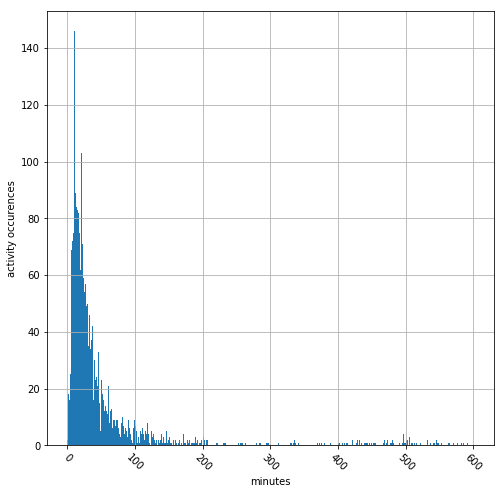

In [32]:
# Plottting
axes = series.hist(xrot=-45, figsize=(8,8),
                                       bins=bins, range=(0,600))
axes.set_xlabel("minutes")
axes.set_ylabel("activity occurences")
plt.show()

Conclusion: Most activity is less than 120 minutes long. So we will use a smaller range to inspect the data.

In [33]:
minutes_to_inspect = 60
minute = 1
bins = int(minutes_to_inspect / minute) # try out values from 1 to 30
bins_in_minutes = minutes_to_inspect / bins

In [34]:
# transform to minutes_to_inspect
short_series = series[series <= minutes_to_inspect]

Observing 60 minutes - bin size: 1.0 minutes


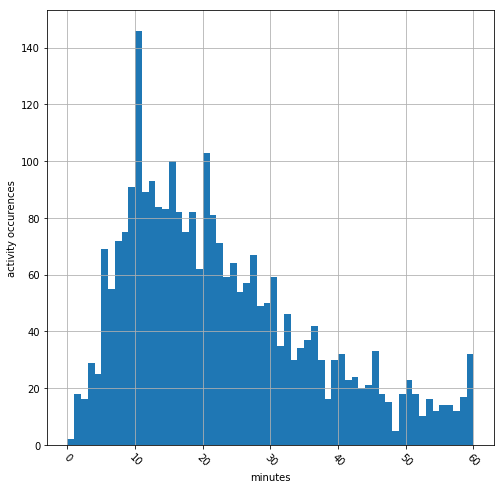

In [35]:
inspection_range = (0,minutes_to_inspect)
print("Observing {} minutes - bin size: {} minutes".format(
    minutes_to_inspect,bins_in_minutes))

# Plottting
axes = short_series.hist(xrot=-45, figsize=(8,8),
                                       bins=bins, range=inspection_range)
axes.set_xlabel("minutes")
axes.set_ylabel("activity occurences")
plt.show()

In [36]:
short_series.describe()

count    2739.000000
mean       22.491420
std        13.840484
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        60.000000
Name: activityDuration[m], dtype: float64

In [37]:
# Display bins with highest activities
amount_of_activity_per_bin = short_series.value_counts(bins=bins)
amount_of_activity_per_bin.iloc[:5]

(9.0, 10.0]     146
(19.0, 20.0]    103
(14.0, 15.0]    100
(11.0, 12.0]     93
(8.0, 9.0]       91
Name: activityDuration[m], dtype: int64

In [38]:
time_with_most_activity = amount_of_activity_per_bin.iloc[:1]
interval = time_with_most_activity.index[0]
lower_val, upper_val = interval.left, interval.right
lower_val, upper_val

(9.0, 10.0)

TOP 5 for minutes of activity (minutes | occurence of activity) 

In [39]:
# indexes of most occured bin
idx_most_occured_interval = short_series[
    (short_series > lower_val) & (short_series <= upper_val)].index.tolist()

In [40]:
clean_table.loc[idx_most_occured_interval].head()

,activity,category,start_date[ms],start_date,end_date[ms],end_date,activityDuration[m]
15,WC,Personal Hygiene,1540205794557,Mon Oct 22 12:56:34 GMT+02:00 2018,1540206394557,Mon Oct 22 13:06:34 GMT+02:00 2018,10
29,WC,Personal Hygiene,1540222410406,Mon Oct 22 17:33:30 GMT+02:00 2018,1540223010406,Mon Oct 22 17:43:30 GMT+02:00 2018,10
58,Trello,Personal Adjusting,1540286897205,Tue Oct 23 11:28:17 GMT+02:00 2018,1540287534150,Tue Oct 23 11:38:54 GMT+02:00 2018,10
106,Youtube,Entertainment,1540360551252,Wed Oct 24 07:55:51 GMT+02:00 2018,1540361153175,Wed Oct 24 08:05:53 GMT+02:00 2018,10
131,Analyzing,Personal Adjusting,1540418780519,Thu Oct 25 00:06:20 GMT+02:00 2018,1540419424342,Thu Oct 25 00:17:04 GMT+02:00 2018,10


Conclusion: TODO What does this information bring me? 

### Clean table creation - Generating Insights - Questions

#### total time spend on categories

In [41]:
clean_table.groupby('category')['activityDuration[m]'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Adventure,6.0,108.000000,88.715275,11.0,35.00,103.5,185.50,205.0
Ease up your life,111.0,38.108108,37.746367,2.0,16.00,27.0,54.50,294.0
Entertainment,208.0,48.894231,39.445901,3.0,21.75,40.0,61.00,283.0
Feeding,483.0,23.275362,18.037557,2.0,12.00,19.0,28.50,171.0
Hobby,14.0,27.785714,20.065963,9.0,12.25,24.0,30.75,72.0
Learning,189.0,49.089947,52.792824,4.0,19.00,30.0,56.00,334.0
Org & Duty,51.0,29.647059,30.711446,4.0,12.50,21.0,30.00,149.0
Personal Adjusting,160.0,22.131250,20.816999,0.0,9.00,15.0,26.50,119.0
Personal Hygiene,326.0,18.273006,15.259066,1.0,9.25,14.0,23.00,154.0


In [42]:
category_sum = clean_table.groupby('category').sum().sort_values(
    'activityDuration[m]', ascending=False)
category_sum = category_sum.drop(['start_date[ms]','end_date[ms]'], 
                                 axis = 1)
category_sum

,activityDuration[m]
category,
Refresh,64555
Purpose,21616
Social - Persist,13529
Feeding,11242
Entertainment,10170
Learning,9278
Transport,9211
Wasted Time,8773
Personal Hygiene,5957


Conclusion: Refresh, Purpose, Social, Purpose are the top categories

#### Average time spend on categories

In [43]:
category_avg = clean_table.groupby('category').mean().sort_values(
    'activityDuration[m]', ascending=False)
category_avg = category_avg.drop(['start_date[ms]','end_date[ms]'], 
                                 axis = 1)
# lets drop 'Untracked' --> this is an outlier 
category_avg.drop('Untracked')

,activityDuration[m]
category,
Refresh,352.759563
Social - New,118.961538
Adventure,108.000000
Social - Important,89.720930
Purpose,73.274576
Learning,49.089947
Entertainment,48.894231
Shopping,39.795455
Ease up your life,38.108108


Conclusion: Interesting to see the differences in avg activity duration. Good for the end custotmer to see.

Feeling that some of them are not accurate meaned (Refresh = sleep --> avg. 6h? ). Further investigation needed. 

#### Total time spend on activities

In [44]:
clean_table.groupby('activity')['activityDuration[m]'].describe()

,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
Analyzing,71.0,25.408451,22.408912,1.0,10.00,16.0,30.00,93.0
Beatbox,2.0,14.500000,7.778175,9.0,11.75,14.5,17.25,20.0
Better Now,47.0,31.255319,25.684937,2.0,16.50,24.0,35.50,145.0
Bike,35.0,28.885714,11.567631,10.0,22.50,27.0,32.00,60.0
Celebration - Bar,20.0,142.350000,172.221484,10.0,54.75,109.0,138.25,751.0
Celebration - Club,1.0,97.000000,NaN,97.0,97.00,97.0,97.00,97.0
Chess,4.0,11.750000,2.217356,9.0,10.50,12.0,13.25,14.0
Clean,172.0,23.273256,17.535287,3.0,12.00,20.0,30.00,154.0
Cut hair,3.0,31.666667,4.509250,27.0,29.50,32.0,34.00,36.0


In [45]:
activity_sum = clean_table.groupby('activity').sum().sort_values(
    'activityDuration[m]', ascending=False)
activity_sum = activity_sum.drop(['start_date[ms]','end_date[ms]'], 
                                 axis = 1)
activity_sum

,activityDuration[m]
activity,
Sleep,63145
Food,6916
Series / Docu,6307
Learning - university,5846
Work - Purpose,5196
Moving - social,4876
Social - girl,4567
Social - Real Life,4273
Purpose - Creation,4269


#### Average time spend on activities

In [46]:
activity_avg = clean_table.groupby('activity').mean().sort_values(
    'activityDuration[m]', ascending=False)
activity_avg = activity_avg.drop(['start_date[ms]','end_date[ms]'], 
                                 axis = 1)
# lets drop 'Untracked' --> this is an outlier 
activity_avg.drop('untracked')

,activityDuration[m]
activity,
Sleep,418.178808
Museum,166.000000
Life Overwhelmed,142.400000
Celebration - Bar,142.350000
Trip to Nature,123.000000
Social - Family,114.433333
Special Place,112.500000
Celebration - Club,97.000000
Purpose,91.000000


# Conclusion: Data exploration
The data consists of a few columns for activity and category and timestamps. Data is available for the past 4 months of a single user. No values are missing in the data.



In [47]:
clean_table.head()

,activity,category,start_date[ms],start_date,end_date[ms],end_date,activityDuration[m]
0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,9
1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,49
2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,443
3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,8
4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,8


# Save clean table

In [48]:
clean_table.to_csv('data/clean_table.csv', index=False)

In [49]:
clean_table.head()

,activity,category,start_date[ms],start_date,end_date[ms],end_date,activityDuration[m]
0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,9
1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,49
2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,443
3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,8
4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,8
